In [1]:
%matplotlib inline


# Bikeshare Ridership 

Notebook to predict the number of riders per day for a bike share network based on the season of year and the given weather.

### Notebook Setup

In [2]:
import os 
import sys 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## Data Loading

In [3]:
data = pd.read_csv('bikeshare.csv')
data.head()

,rowid,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.riders.mean()

189.46308763450142

In [5]:
from sklearn.model_selection import train_test_split as tts 

features = [
    'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 
    'weather', 'temp', 'feelslike', 'humidity', 'windspeed', 
]

target = 'registered' # can be one of 'casual', 'registered', 'riders'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

## Do Some Regression 

In [6]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 

In [7]:
# OLS 
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.324 MSE=15565.017


In [8]:
# L2 and L1 Regularization 
alphas = np.logspace(-10, 0, 200)

In [9]:
from sklearn.linear_model import RidgeCV 

model = RidgeCV(alphas=alphas) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.alpha_))

r2=0.324 MSE=15567.056 alpha=1.000


In [10]:
from sklearn.linear_model import LassoCV 

model = LassoCV(alphas=alphas) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.alpha_))

r2=0.324 MSE=15566.351 alpha=0.009


In [11]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(alphas=alphas) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.323 MSE=15575.267


<Axes: ylabel='registered'>

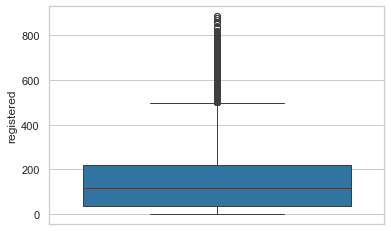

In [12]:
sns.boxplot(y=target, data=data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline 

model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('lasso', LassoCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['lasso'].alpha_))

In [14]:
model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=0.467 MSE=12276.722 alpha=0.078


In [15]:
model = Pipeline([
    ('poly', PolynomialFeatures(3)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=0.537 MSE=10655.139 alpha=0.198


In [16]:
model = Pipeline([
    ('poly', PolynomialFeatures(4)), 
    ('ridge', RidgeCV(alphas=alphas)),
])

model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['ridge'].alpha_))

r2=0.341 MSE=15169.422 alpha=1.000


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.941 MSE=1349.073


## Save the Forests!

In [18]:
import pickle 

with open('forest-riders.pkl', 'wb') as f:
    pickle.dump(model, f)

In [19]:
with open('forest-riders.pkl', 'rb') as f:
    model = pickle.load(f)

In [20]:
model.predict(X_test)

array([107.77, 265.71,  81.47, ...,  44.39,  78.44,  20.92])

In [21]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.660 MSE=7828.368


In [22]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.323 MSE=15570.861


In [23]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.910618115551274